<span style="font-family: 'Times New Roman'; font-size: 18px;">

# Random Forest Project 
## Introduction
This project will entail the exploration of data that is publicly accessible through lendingclub.com. Lending Club links individuals in need of funds (borrowers) with individuals who possess funds (investors). Ideally, as an investor, you would prefer to invest in individuals who demonstrate a strong likelihood of repaying you. Our goal is to develop a model that can be used to forecast this outcome.

The year 2016 was quite eventful for Lending Club, so let's delve into their statistics while considering the circumstances. The information dates back to a time before their initial public offering. Our aim is to analyze loan records from 2007 to 2010 to determine if borrowers repaid their loans completely. The following is an explanation of each column:

* **credit.policy**: Set at 1 when the client fulfills LendingClub.com's credit evaluation standards, and at 0 if otherwise.
* **purpose**: The loan's intention (options include "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The loan's interest rate represented as a percentage (e.g., 11% would be written as 0.11). LendingClub.com charges higher interest rates to borrowers considered riskier.
* **installment**: The regular payments that the borrower has to make once the loan is funded.
* **log.annual.inc**: The logarithm of the borrower's reported yearly earnings.
* **dti**: The ratio of the borrower's debt to their yearly income.
* **fico**: The borrower's FICO credit rating.
* **days.with.cr.line**: The total days the borrower has possessed a credit line.
* **revol.bal**: The remaining balance that the borrower has at the end of the credit card billing cycle.
* **revol.util**: The rate at which the borrower uses their credit line compared to the total available credit.
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: How often the borrower has exceeded a 30-day delay in payments within the previous 2 years.
* **pub.rec**: The amount of negative public records associated with the person borrowing money (such as bankruptcy filingsegments).
</span>

</span>
.</span>



<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Import libraries

We import the usual libraries for pandas and plotting. 

</span>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Get the Data

Pandas is utilized for loading loan_data.csv into a dataframe named loans.
</span>


In [4]:
loans = pd.read_csv('loan_data.csv')

<span style="font-family: 'Times New Roman'; font-size: 18px;">


We check out the info(), head(), and describe() methods on loans. 

</span>


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<span style="font-family: 'Times New Roman'; font-size: 18px;">

## Exploratory Data Analysis
Time for some data visualization! Utilizing seaborn and pandas' default plotting features, we'll generate a histogram displaying two FICO distributions stacked on one another, each corresponding to a credit.policy result.

</span>


Text(0.5, 0, 'FICO')

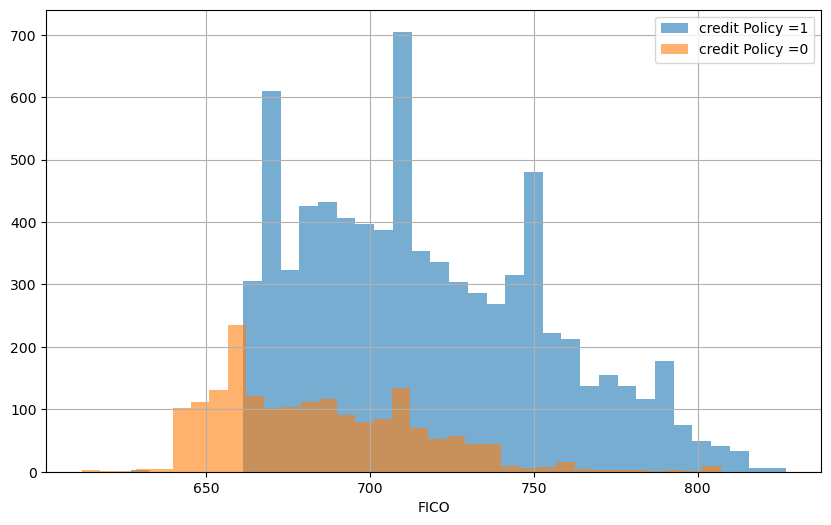

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, label='credit Policy =1' , alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, label='credit Policy =0', alpha=0.6)
plt.legend()
plt.xlabel("FICO")

<span style="font-family: 'Times New Roman'; font-size: 18px;">

People who tend to have a lower FICO score have a credit policy of zero. And remember that credit policy of one is if the customer meets the credit underwriting criteria of [LendingClub.com](www.lendingclub.com), and it's zero if otherwise. We want to go ahead and check this out by looking at this cutoff point. And you can see that basically any one for final score of less than around 660 will automatically not meet the credit underwriting criteria of [LendingClub.com](www.lendingclub.com) . 
Let's go ahead and create a similar figure except this time by checking the not fully paid column. 

</span>

Text(0.5, 0, 'FICO')

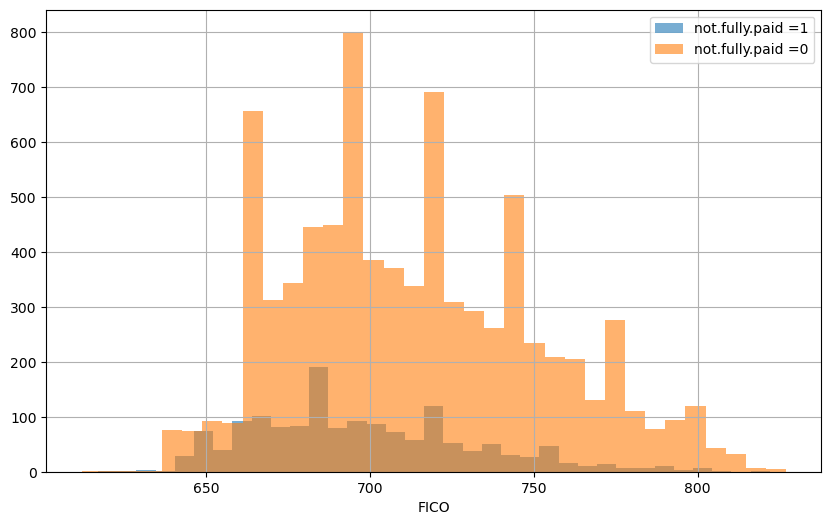

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, label='not.fully.paid =1' , alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, label='not.fully.paid =0', alpha=0.6)
plt.legend()
plt.xlabel("FICO")

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Here again, we can see that the majority of people have zero for not fully paid. 
Meaning the majority of people are actually fully paying off these loans. And we can see that more or less a similar distribution between both not fully paid equals one and not fully paid equals zero. Doesn't seem to have the same sharp cut-off on FICO score as the previous credit policy that you can see it essentially overlaps. The only difference is the actual counts and you'll notice that there is kind of weird spikes at certain points and that's just because of the way FICO credit scoring works that certain points will have a larger distribution of likelihood of being your FICO score. let's move along by creating a countplot using seaborne showing the counts of loan by purpose. With the color hue defined by not fully paid. 
</span>


<Axes: xlabel='purpose', ylabel='count'>

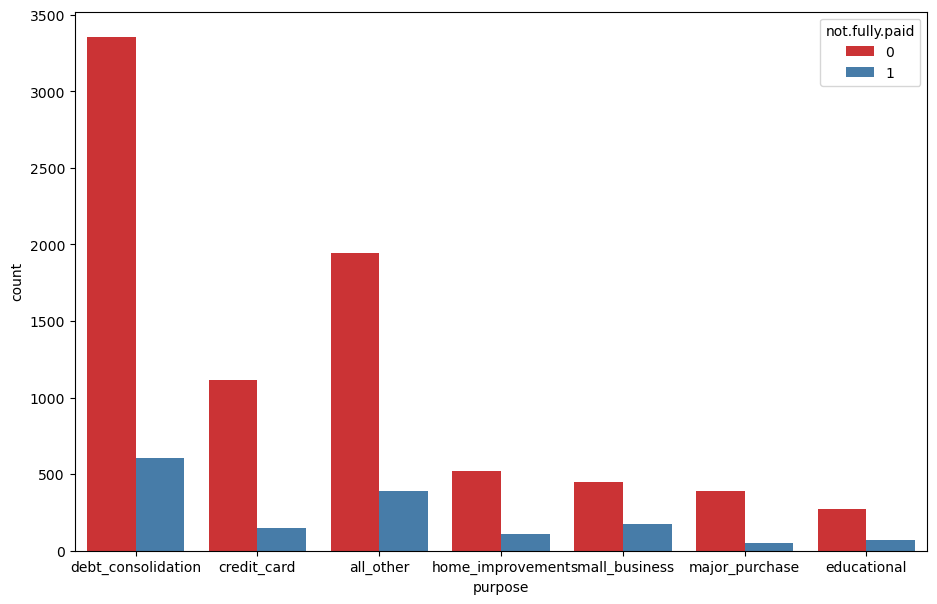

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

So just by looking at this plot we can tell that debt consolidation seems to be the most popular reason for wanting a loan and then credit card and all other reasons. Our second and third place with things such as home improvement small business major purchase and educational reasons being much lower on that list. 
Something to note here is that the ratio between not fully paid and fully paid seems to be pretty similar for all the reasons. Let's go ahead and continue on by seeing the trend between FICO score and interest rate. 
</span>

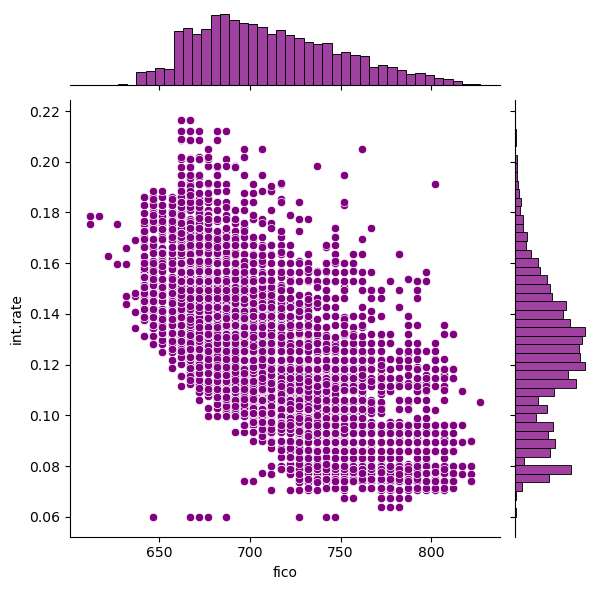

In [11]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

So we're going to recreate this falling joint plot and you can see here that as your FICO score increases the interest rate you have to pay off that loan tends to decrease which is understandable. 
It is logical that with a higher FICO score, your credit improves. As your credit score decreases, the interest rate on your loans is likely to increase, and conversely, if your FICO score improves, you can expect a lower interest rate on your loan.

The next step is to develop L-M plots to determine if there was a difference in trend between not fully paid and credit policy.
</span>

<Figure size 1100x700 with 0 Axes>

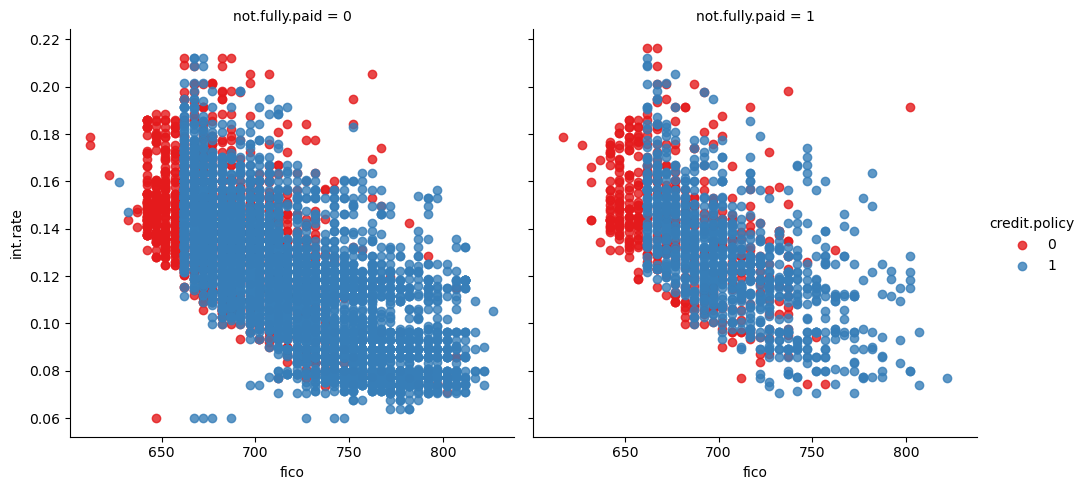

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', col='not.fully.paid',palette='Set1', fit_reg=False )

<span style="font-family: 'Times New Roman'; font-size: 18px;">

We noticed cutoff around the 650 mark and we split this up into two columns. So here we have the columns representing the not fully paid value and the coloring representing the credit policy. The behavior remains consistent regardless of whether the payment was completed or not, and whether the credit policy was rejected or approved. 

Now, let's explore how to handle the categorical variables in our dataset as we start constructing our decision tree.

## Setting up the Data
Let's begin arranging our data for the Random Forest Classification Model. We check loans.info() again. This approach will reveal to us the existence of a categorical column that needs to be managed. And that was the purpose column that we previously plotted out with this visualization. 

</span>

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Categorical Features
We will notice that we have a categorical column to deal with. And that is the purpose column that we previously plotted out with this visualization. Let's utilize pd.get_dummies to convert it into dummy variables.  

We generate a single-item list that includes the string 'purpose'. We call this Cat_feats. The reason we're doing this is that it is a way just to expand this to multiple categorical columns. 

</span>

In [14]:
cat_feats = ['purpose']

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
Now we use pd.get_dummies(loans, columns=cat_feats, drop_first=True) to create a fixed dataframe that has new feature columns with dummy variables. We set this dataframe as final_data.  

</span>

In [15]:
final_data = pd.get_dummies(loans,columns=cat_feats, drop_first=True )

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
In this case, we are presented with a series of zeros and ones corresponding to each of those purposes.  
## Train Test Split

Now it's time to split our data into a training set and a testing set. We use sklearn to split our data.  
</span>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Train a Decision Tree Model 

Our plan is to only train one decision tree. 
</span>

In [20]:
from sklearn.tree import DecisionTreeClassifier

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
The next step is to instantiate a decision tree classifier. 
</span>

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Predictions and Evaluation of Decision Tree

Predictions are made based on the test set, followed by the generation of a classification report and a confusion matrix.   
</span>

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



<span style="font-family: 'Times New Roman'; font-size: 18px;">

 It looks like we have precision and recall around 75%. 
</span>

In [26]:
print(confusion_matrix(y_test,predictions))

[[1993  438]
 [ 341  102]]


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Training the Random Forest model

It's time to start training our model by using the RandomForestClassifier Class and fitting it with the training data we prepared earlier.   
</span>

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=300)

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model. We will predict the class of not.fully.paid for the X_test data. 
</span>

In [30]:
predictions = rfc.predict(X_test)

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.42      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



<span style="font-family: 'Times New Roman'; font-size: 18px;">
We can see that here when we look at the weighted average, which makes more sense because of imbalanced categories, we have reached a precision of 81% and an accuracy of 78%.  
Now let's check out the confusion matrix.  
</span>

In [32]:
print(confusion_matrix(y_test, predictions))

[[2420   11]
 [ 435    8]]


<span style="font-family: 'Times New Roman'; font-size: 18px;">
    
## Conclusion
It's worth noting that there has been an enhancement in the precision, recall, and F1 score for specific categories, resulting in an overall improvement when averaged across all categories. But the recall for  instance for Class 1 here it's 0.02, and if you compare it to a single decision tree it's 0.23. Now we need to determine which is more effective: the random forest or the decision tree.

Well, it really depends on what metric you're trying to optimize for. Notice that recall for each class for the models neither did very well, but the single decision tree did better on Class1 for recall than our  random forest here which only got point 0.02, likewise for the F1 score it's 0.4 for Class 1 versus 0.22 for class 1 on the decision tree. The outcome is heavily influenced by the expenses related to each of these calls. On the whole, the random force model performed better when considering the average, yet it significantly underperformed in specific areas. To comprehend the optimal model in this scenario, we must rely on our expertise in the business domain, which corresponds to the third circle of the Venn diagram.  
</span>